<a href="https://colab.research.google.com/github/harsha-bsm/Topic-Modelling-using-LDA-and-NMF-reviewsflipkart/blob/master/EDA_on_REDMI_K20_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests as re
import pandas as pd
from bs4 import BeautifulSoup
import re as regex


In [ ]:
dict_class={}

In [ ]:
datami=pd.read_csv("data_mi7830.csv")

In [ ]:
datami.shape

(7830, 7)

In [ ]:
datami.head()

,time_of_review,Model,rating,user,review,title,user_address
0,7months ago,Redmi K20 Pro Flame Red 128 Gb Reviews: Latest...,5,Karishma Vithlani,It's awesome display not so new type but phone...,Awesome,"Certified Buyer, Rajkot"
1,7months ago,Redmi K20 Pro Flame Red 128 Gb Reviews: Latest...,5,Rajendra Shinde,Excellent camera excellent performance ..Redmi...,Must buy!,"Certified Buyer, Pune"
2,11months ago,Redmi K20 Pro Flame Red 128 Gb Reviews: Latest...,5,Srutisagar Sahu,Giving my review after 1 month of usage. Hope ...,Wonderful,"Certified Buyer, Hyderabad"
3,10months ago,Redmi K20 Pro Flame Red 128 Gb Reviews: Latest...,5,Jagdish Sharma,nice phone battery is good camera is good fron...,Just wow!,"Certified Buyer, Mohali"
4,"Jul, 2019",Redmi K20 Pro Flame Red 128 Gb Reviews: Latest...,5,Akshai G Pillai,"Detailed review after 5 days of use K20 Pro , ...",Great product,"Certified Buyer, Pathanamthitta District"


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##EDA TITLE

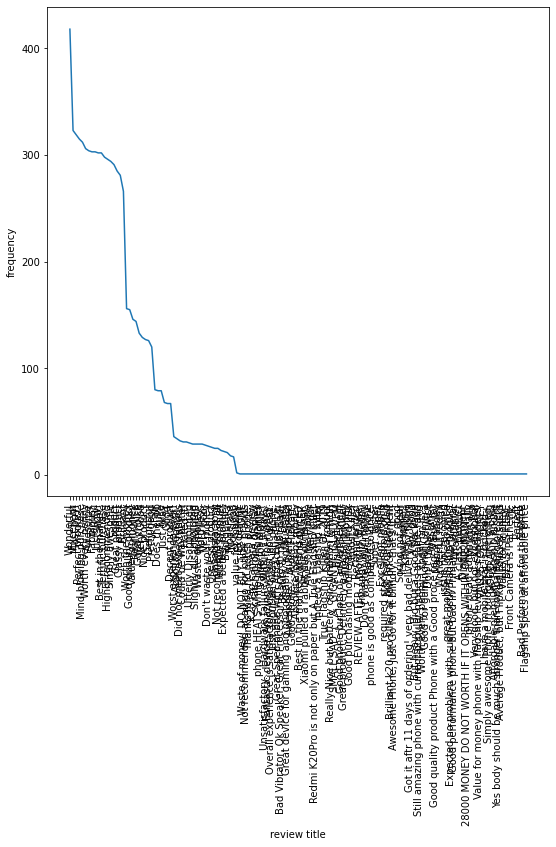

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(datami.title.value_counts())
plt.xlabel("review title")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

##### The following are the 15 most repetetive titles

In [ ]:
datami["title"].value_counts()[:16]

Wonderful                418
Excellent                323
Must buy!                319
Perfect product!         315
Mind-blowing purchase    312
Worth every penny        306
Awesome                  304
Fabulous!                303
Terrific                 303
Just wow!                302
Best in the market!      302
Terrific purchase        298
Highly recommended       296
Simply awesome           294
Super!                   291
Great product            285
Name: title, dtype: int64

In [ ]:
import wordcloud

In [ ]:
listwords=[]
for each in datami["title"].values:      #removing spacesin each titleandconsidering entire titleas one word
  listwords.append("".join(each.split(" ")))
  

In [ ]:
words=""
words=" ".join(listwords)               #joining all the words into an essay and feeding it into an essay 

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords=set(STOPWORDS) # getting the stopping words\
# Generating a Wordcloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
             
                min_font_size = 10).generate(words) 

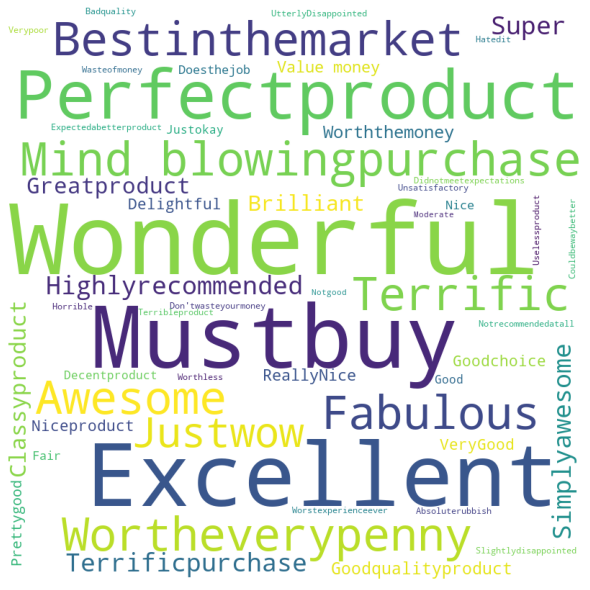

In [ ]:
# Plotting the WordCloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

#### From the WordCloud, it seems that most of the review titles are positive in nature

### EDA REVIEW

In [ ]:
datami["review"]

0       It's awesome display not so new type but phone...
1       Excellent camera excellent performance ..Redmi...
2       Giving my review after 1 month of usage. Hope ...
3       nice phone battery is good camera is good fron...
4       Detailed review after 5 days of use K20 Pro , ...
                              ...                        
7825                       superb mobile, value for money
7826    Camera could have been little better with this...
7827    VERY BAD USER INTERFACE. SAMSUNG GALAXY M10 IS...
7828                              Not As Per Acception...
7829                                          touch issue
Name: review, Length: 7830, dtype: object

### USER RATING

In [ ]:
datami["rating"].value_counts()

5    5433
4    1390
3     449
1     415
2     143
Name: rating, dtype: int64

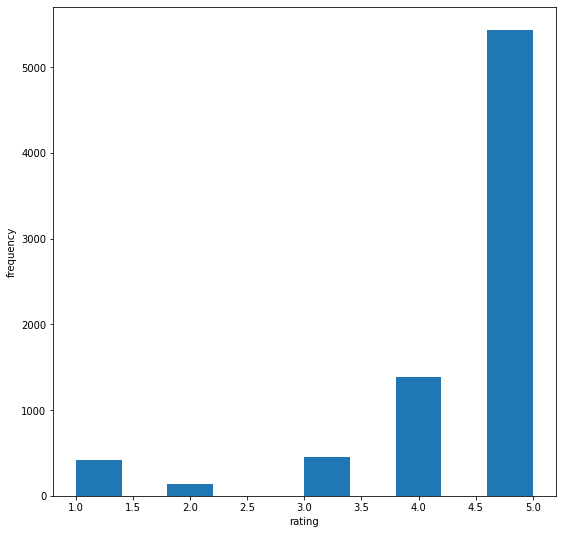

In [ ]:
plt.figure(figsize=(9,9))
plt.hist(datami.rating)
plt.xlabel("rating")
plt.ylabel("frequency")
plt.show()

#### From above histogram it is evident that most of the ratings are 5/5

### USER_ADDRESS

In [ ]:
datami["user_address"]=[x.replace("Certified Buyer,","").strip() for x in datami["user_address"].values.tolist()]

In [ ]:
datami["user_type"]="Certified Buyer"

In [ ]:
datami.head()

,time_of_review,Model,rating,user,review,title,user_address,user_type
0,7months ago,Redmi K20 Pro Flame Red 128 Gb Reviews: Latest...,5,Karishma Vithlani,It's awesome display not so new type but phone...,Awesome,Rajkot,Certified Buyer
1,7months ago,Redmi K20 Pro Flame Red 128 Gb Reviews: Latest...,5,Rajendra Shinde,Excellent camera excellent performance ..Redmi...,Must buy!,Pune,Certified Buyer
2,11months ago,Redmi K20 Pro Flame Red 128 Gb Reviews: Latest...,5,Srutisagar Sahu,Giving my review after 1 month of usage. Hope ...,Wonderful,Hyderabad,Certified Buyer
3,10months ago,Redmi K20 Pro Flame Red 128 Gb Reviews: Latest...,5,Jagdish Sharma,nice phone battery is good camera is good fron...,Just wow!,Mohali,Certified Buyer
4,"Jul, 2019",Redmi K20 Pro Flame Red 128 Gb Reviews: Latest...,5,Akshai G Pillai,"Detailed review after 5 days of use K20 Pro , ...",Great product,Pathanamthitta District,Certified Buyer


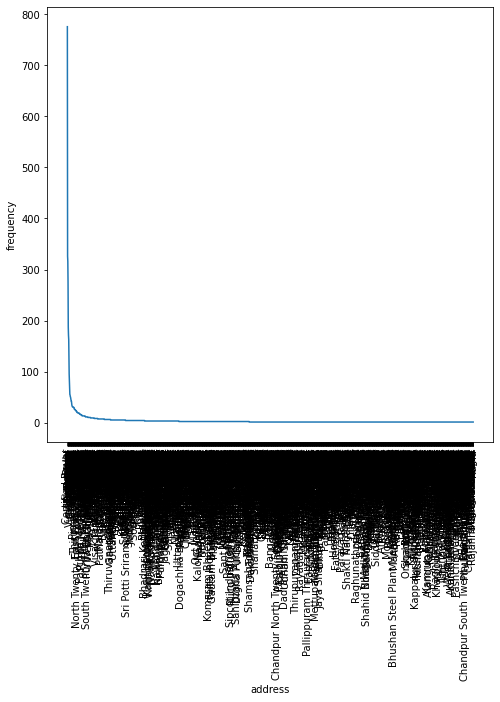

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(datami.user_address.value_counts())
plt.xlabel("address")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

In [ ]:
temp=pd.DataFrame(datami.groupby(datami.user_address)["user_type"].count())
temp=temp.sort_values(by="user_type",ascending=False)

In [ ]:
import numpy as np

In [ ]:
for i  in range(90,101,1):
  l=np.percentile(datami["user_address"].value_counts(),i)
  print(str(i)+"th percentile value --->> "+str(l))

90th percentile value --->> 6.0
91th percentile value --->> 7.0
92th percentile value --->> 7.0
93th percentile value --->> 8.0
94th percentile value --->> 9.0
95th percentile value --->> 11.0
96th percentile value --->> 13.0
97th percentile value --->> 17.0
98th percentile value --->> 24.0
99th percentile value --->> 42.0
100th percentile value --->> 776.0


In [ ]:
top_adresses=datami["user_address"].value_counts()[(datami["user_address"].value_counts()>24)]


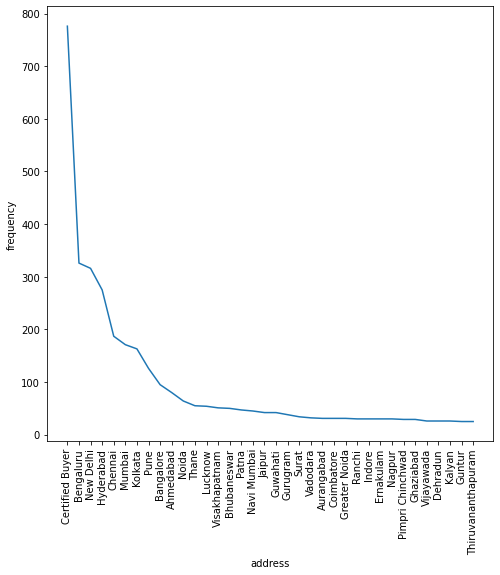

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(top_adresses)
plt.xlabel("address")
plt.ylabel("frequency")
plt.xticks(rotation=90,fontsize=10,fontweight="light")
plt.show()

#### The above graph shows the top 5 percentile of districts having highest orders

### REVIEW

In [ ]:
totalreview=" ".join(datami["review"])

In [ ]:
stopwords=set(STOPWORDS) # getting the stopping words\
# Generating a Wordcloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',stopwords=stopwords,
             
                min_font_size = 10).generate(totalreview) 

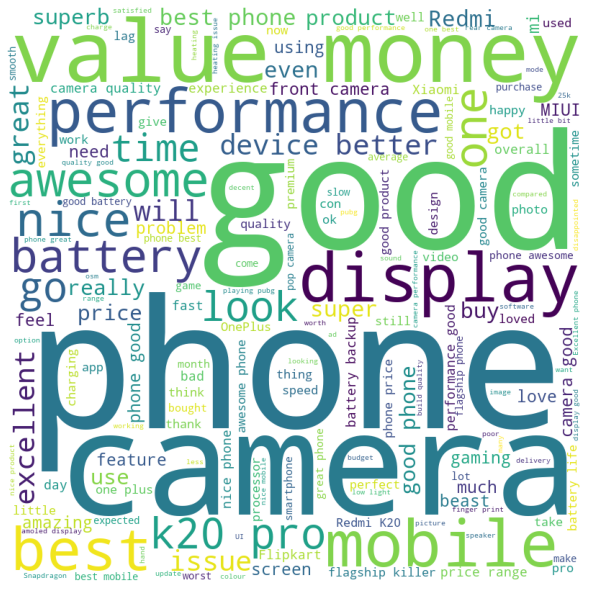

In [ ]:
# Plotting the WordCloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
datami.to_csv("mi7830.csv")